In [26]:
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)


import matplotlib.pyplot as plt

# 폰트를 기본폰트로 설정
plt.rc('font', family='NanumBarunGothic')

# 그래프 DPI 기본값 변경
plt.rcParams['figure.dpi'] = 100


# 도서관 자료 파일 다운로드
import gdown
import pandas as pd

filename = 'pt_book_fix.csv'
url = '1ps6pZX60zHRZ343cijDCf0I51RRpNTXk'

if url != '' :
    gdown.download(f'https://drive.google.com/uc?id={url}', filename, quiet=False)
    dir = ''
else :
    dir = '../_csv/'  # 로컬 컴퓨터 환경에서 사용할 dir (예제는 _csv)

pt_book = pd.read_csv(f'{dir}{filename}', low_memory=False)
pt_book.head()

Downloading...
From: https://drive.google.com/uc?id=1ps6pZX60zHRZ343cijDCf0I51RRpNTXk
To: /content/pt_book_fix.csv
100%|██████████| 28.3M/28.3M [00:01<00:00, 25.3MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,세이노의 가르침,세이노 지음,데이원,2023,9.79117E+12,NaN,0,NaN,199.1,1,0,2023-03-30
1,2,서울대생의 비밀과외,"소린TV,안소린 [공]지음",다산에듀,2023,9.79113E+12,NaN,1,NaN,373.7,1,0,2023-03-30
2,3,(현직 고등학교 선생님들이 직접 고른) 생기부 필독서 100,주경아 외 지음,센시오,2023,9.79117E+12,NaN,1,NaN,376.6,1,0,2023-03-30
3,4,당연하게도 나는 너를,이꽃님 지음,우리학교,2023,9.79117E+12,NaN,4,NaN,813.7,1,0,2023-03-30
4,5,고요한 우연,김수빈 지음,문학동네,2023,9.78895E+12,NaN,0,NaN,813.7,1,0,2023-03-30


In [27]:
top30_pubs=pt_book['출판사'].value_counts()[:30]  #출판한 책들이 가장 많은 출판사 top 30
top30_pubs_idx=pt_book['출판사'].isin(top30_pubs.index)    #책들이 top30 출판사에서 출판한 책인지 아닌지

top30_pubs_idx.sum() #top30 출판사들이 출판한 책들의 합

34738

In [28]:
pt_sample=pt_book[top30_pubs_idx].sample(1000,random_state=42)



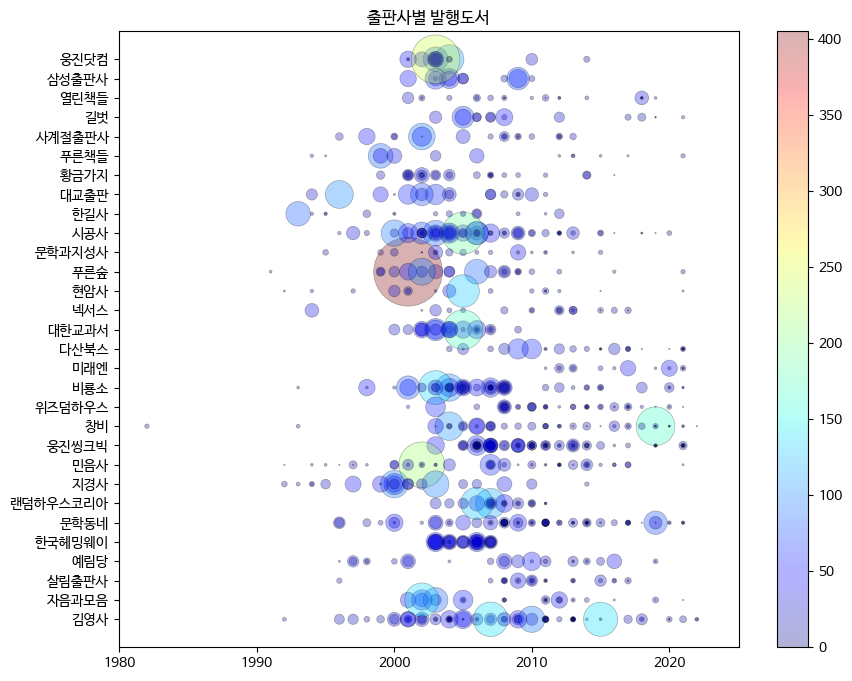

In [29]:
fig, ax=plt.subplots(figsize=(10,8))

sc=ax.scatter(pt_sample['발행년도'],pt_sample['출판사'],
           s=pt_sample['대출건수']**1.3,
           c=pt_sample["대출건수"],
           cmap='jet',
           linewidth=0.5,edgecolors='k',alpha=0.3)
ax.set_title("출판사별 발행도서")
fig.colorbar(sc)
fig.show()

In [30]:
plt.rcParams['lines.markersize']

6.0

In [32]:
pt_pubs=pt_book[top30_pubs_idx][['출판사','발행년도','대출건수']]
pt_pubs=pt_pubs.groupby(by=['출판사','발행년도']).sum() #예)길벗 1995 기준으로한 대출건수의 합계
pt_pubs=pt_pubs.reset_index()
pt_pubs[pt_pubs['출판사']=='길벗']

,출판사,발행년도,대출건수
0,길벗,1994,15
1,길벗,1995,43
2,길벗,1996,19
3,길벗,1997,14
4,길벗,1998,101
5,길벗,1999,274
6,길벗,2000,122
7,길벗,2001,150
8,길벗,2002,515
9,길벗,2003,505


In [34]:
line1=pt_pubs[pt_pubs['출판사']=='길벗']
line2=pt_pubs[pt_pubs['출판사']=='황금가지']

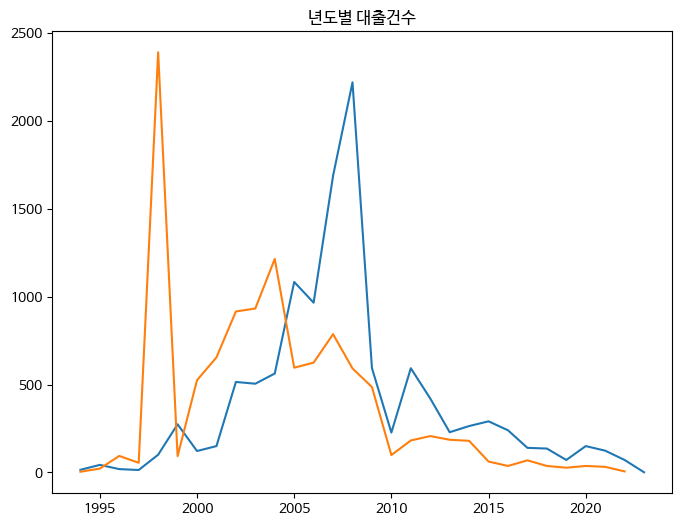

In [36]:
fig, ax=plt.subplots(figsize=(8,6))


ax.plot(line1['발행년도'],line1['대출건수'])
ax.plot(line2['발행년도'],line2['대출건수'])
ax.set_title('년도별 대출건수')
fig.show()

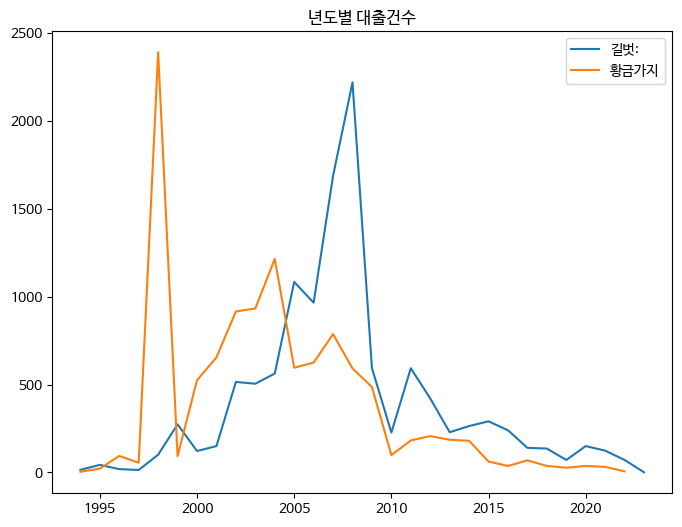

In [40]:
fig, ax=plt.subplots(figsize=(8,6))


ax.plot(line1['발행년도'],line1['대출건수'],label="길벗:")
ax.plot(line2['발행년도'],line2['대출건수'],label="황금가지")
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

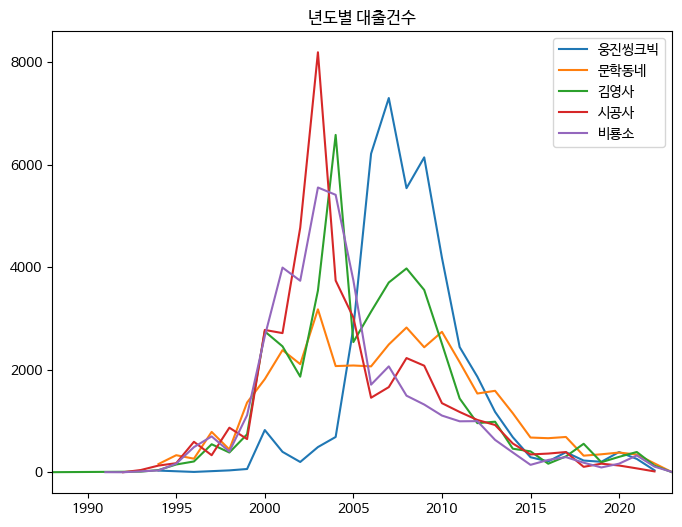

In [47]:
fig, ax=plt.subplots(figsize=(8,6))

for pub in top30_pubs.index[:5]:
  line=pt_pubs[pt_pubs['출판사']==pub]
  ax.plot(line['발행년도'],line['대출건수'],label=pub)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1988,2023)
fig.show()

In [51]:
pt_pivot=pt_pubs.pivot_table(index='출판사',columns='발행년도')
top10_pubs=pt_pivot.columns[:10]
year_cols=pt_pivot.columns.get_level_values(1)

KeyError: ignored

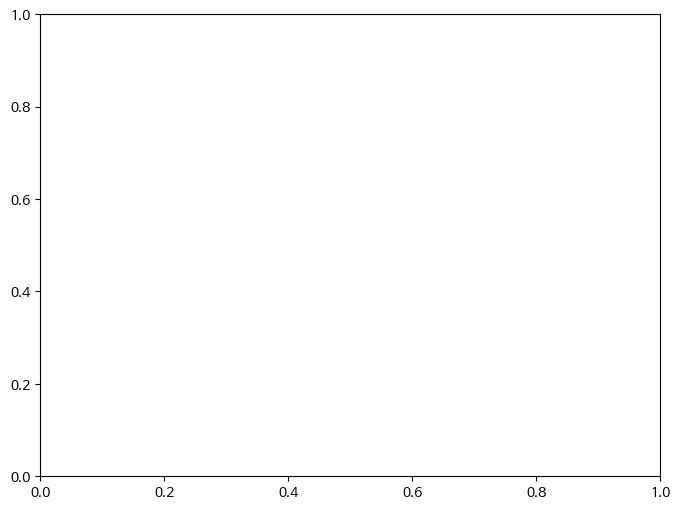

In [53]:
fig, ax=plt.subplots(figsize=(8,6))
ax.stackplot(year_cols,pt_pivot.loc[top10_pubs].fillna(0),labels=top10_pubs)
ax.set_title('년도별 대출건수')
ax.legend()
ax.set_xlim(1988,2023)
fig.show()

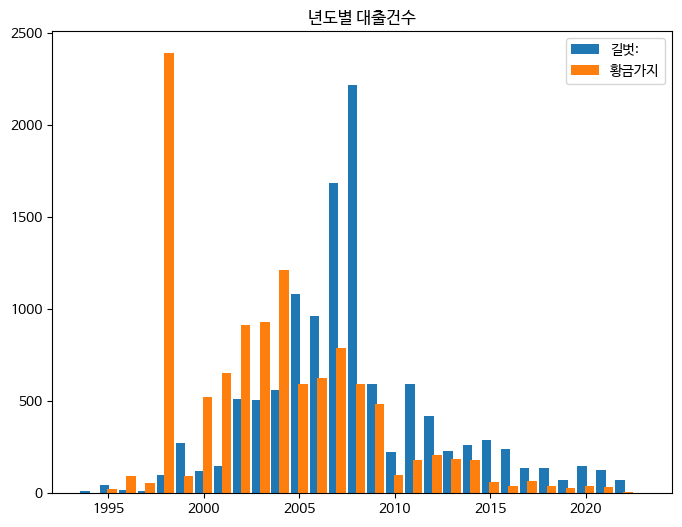

In [60]:
fig, ax=plt.subplots(figsize=(8,6))


ax.bar(line1['발행년도']-0.2,line1['대출건수'],width=0.5,label="길벗:")
ax.bar(line2['발행년도']+0.2,line2['대출건수'],width=0.5,label="황금가지")
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

In [61]:
data=top30_pubs[:10]
labels=top30_pubs.index[:10]

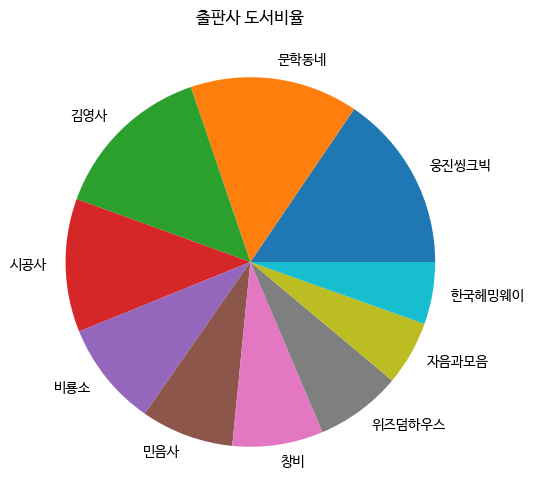

In [62]:
fig,ax=plt.subplots(figsize=(8,6))

ax.pie(data,labels=labels)
ax.set_title("출판사 도서비율")
fig.show()

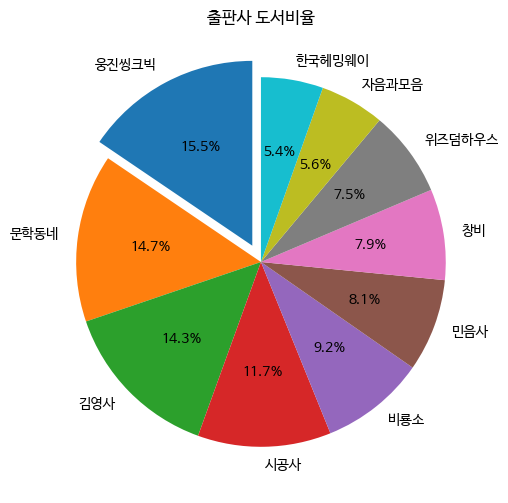

In [70]:
fig,ax=plt.subplots(figsize=(8,6))

ax.pie(data,labels=labels,startangle=90,autopct='%.1f%%',explode=[0.1]+[0]*9)
ax.set_title("출판사 도서비율")
fig.show()

In [ ]:
2